61.0
62.299999999999955
29.0
54.0
49.0
41.0
104.0
70.0
0.0
0.0
6.0
0.0
31.0
19.0
26.0
41.0
2.0
36.59999999999991
9.0
3.0
1.0
4.0
36.0
22.0


/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


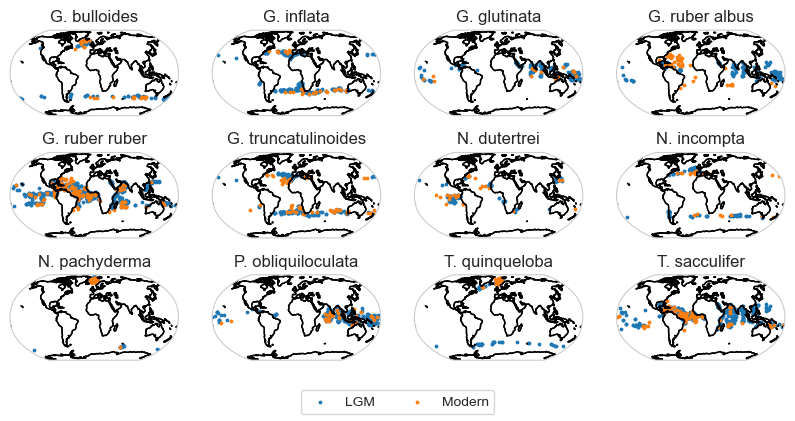

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# OBSERVATION DATA
forcens = pd.read_csv("~/foram_core/tidy/forcens_sp_a_wsst.csv")
lgm = pd.read_csv("~/foram_core/tidy/lgm_sp_a_wsst.csv")

## a function of optimal temperature
def get_opt_temp(age, species):
    ## select latitudes, longitudes and species columns
    data = {
        "G. bulloides": [5, 10], # 5 deg
        "G. glutinata": [26, 29], # 3 deg
        "G. inflata": [14, 19], # 5 deg
        "G. ruber albus": [21, 29], # 8 deg
        "G. ruber ruber": [22, 26], # 4 deg
        "G. truncatulinoides": [17, 19], # 2 deg
        "N. dutertrei": [20, 23], # 3 deg
        "N. incompta": [12, 14], # 2 deg
        "N. pachyderma": [-2, 0], # 2 deg
        "P. obliquiloculata": [26, 29], # 3 deg
        "T. quinqueloba": [-1, 5], # 6 deg
        "T. sacculifer": [23, 27] # 4 deg
    }
    if age == "lgm":
        return data[species][0]
    elif age == "pi":
        return data[species][1]
    else:
        return None

## write a function to filter species
def sp_opt_sub(df, age, species):
    ## select latitudes, longitudes and species columns
    df_sub = df[['Latitude','Longitude',species, "SST"]]
    ## get optimal temperature
    opt_temp = get_opt_temp(age, species)
    ## 1. high abundance
    q = np.nanpercentile(df_sub[species], 70)
    print(q)
    df_sub = df_sub[df_sub[species] >= q]
    ## 2. optimal temperature
    df_sub = df_sub[abs(df_sub["SST"] - opt_temp) <= 1.5]

    return df_sub

## write a function to plot optimal niche, just occurence
def plot_opt_niche(ax, df, age, species):
    ## select latitudes, longitudes and species columns
    df_sub = sp_opt_sub(df, age,  species)
    ## plot
    ax.scatter(df_sub.Longitude, df_sub.Latitude, s=3, transform=ccrs.PlateCarree())

    ## add coastlines
    ax.coastlines()
    ax.set_global()

    ## set title
    ax.set_title(species)

    return ax

## do this for multiple species
fig, axes = plt.subplots(nrows=3, ncols=4,
                         figsize=(10, 4.5),
                         subplot_kw=dict(projection=ccrs.Robinson()))

species_list = ["G. bulloides", "G. inflata", "G. glutinata",
                "G. ruber albus", "G. ruber ruber", "G. truncatulinoides",
                "N. dutertrei", "N. incompta","N. pachyderma",
                "P. obliquiloculata","T. quinqueloba", "T. sacculifer"]

for i, ax in enumerate(axes.flat):
    plot_opt_niche(ax, forcens, "pi", species_list[i])
    plot_opt_niche(ax, lgm, "lgm",species_list[i])

## add legend
fig.legend(["LGM", "Modern"], loc="lower center", ncol=2)

## save the fig
fig.savefig("../output/opt_niche_change.png", dpi=400, bbox_inches='tight')